In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltz
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("kidney_disease.csv")

In [ ]:
import random
np.random.seed(12)
random.seed(12)

In [ ]:
data = data.sample(frac = 1)
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
280,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,52,8100,5.2,no,no,no,good,no,no,notckd
387,387,15.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50,6200,5.2,no,no,no,good,no,no,notckd
313,313,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,52,8200,4.8,no,no,no,good,no,no,notckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
35,35,65.0,90.0,1.020,2.0,1.0,abnormal,normal,notpresent,notpresent,...,36,9800,4.9,yes,yes,no,poor,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,57.0,70.0,1.015,1.0,0.0,NaN,abnormal,notpresent,notpresent,...,31,4200,3.9,no,no,no,good,no,no,ckd
253,253,57.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,42,6200,6.2,no,no,no,good,no,no,notckd
390,390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,52,6300,5.3,no,no,no,good,no,no,notckd
155,155,50.0,70.0,1.020,3.0,0.0,abnormal,normal,present,present,...,36,4700,NaN,no,no,no,good,no,no,ckd


In [ ]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
# dropping id column
data.drop('id', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 280 to 331
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    o

In [ ]:
for i in data.columns:
  print(i)
  print(data[i].unique())
  print("********************")


age
[47. 15. 55.  7. 65. 59. 82. 53. 57. 60. 63. 50. 40. 73. 68. 25. 90.  5.
 37. 67. 44. 72. 80. 56. 70. 74. 62. 69. 48. 42. 64. 52. 34. 33. 39. nan
 45. 24. 41. 66. 71. 61. 58. 26. 54. 19. 75. 46.  8. 35. 27. 28. 51. 43.
  6. 21. 23. 32. 12. 30. 36. 38. 11. 78. 76. 49. 29. 14. 20.  4. 83. 22.
 17.  2. 79.  3. 81.]
********************
bp
[ 80.  50.  90. 100.  60.  70.  nan 180. 110. 140. 120.]
********************
sg
[  nan 1.025 1.02  1.015 1.01  1.005]
********************
al
[nan  0.  4.  2.  1.  3.  5.]
********************
su
[nan  0.  1.  2.  3.  4.  5.]
********************
rbc
[nan 'normal' 'abnormal']
********************
pc
[nan 'normal' 'abnormal']
********************
pcc
['notpresent' 'present' nan]
********************
ba
['notpresent' 'present' nan]
********************
bgr
[ 93. 104.  nan 270. 255. 140. 105. 269. 280. 303. 230. 118. 171.  88.
 139.  99. 294. 201. 119.  95. 415. 184. 137. 100.  78.  83. 121.  75.
 106. 224. 208. 117. 130. 157. 110. 163. 360. 214. 111. 

In [ ]:
data.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"},inplace=True)

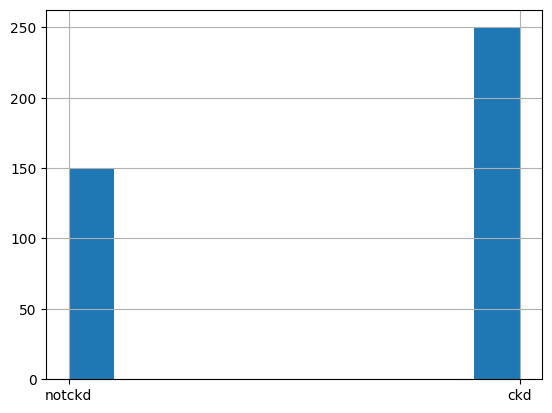

In [ ]:
import matplotlib.pyplot as plt
data['classification'].hist()
plt.show()

In [ ]:
for i in data.columns:
  if data[i].dtypes == "object":
    for j in range(len(data[i].unique())):
      data[i].replace({data[i].unique()[j]:j},inplace=True)

In [ ]:
x = data.drop("classification",axis=1)
y = data["classification"]

In [ ]:
for i in x.columns:
  x[i].fillna(x[i].mean(),inplace=True)

In [ ]:
x.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
class_count = y.value_counts()
minority_class = class_count.index[1]
majority_class = class_count.index[0]
target_samples = 1150 - class_count[minority_class]

# Upsample both classes by appling SMOTE
smote = SMOTE(sampling_strategy={minority_class: target_samples, majority_class: target_samples}, random_state=42)
x, y = smote.fit_resample(x, y)

# Class distribution after SMOTE
print(y.value_counts())

0    1000
1    1000
Name: classification, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 250)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 250)
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf

tf.random.set_seed(12)

model = Sequential()
model.add(Dense(120, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/100
44/44 [==============================] - 3s 26ms/step - loss: 1.7264 - accuracy: 0.7321 - val_loss: 0.4289 - val_accuracy: 0.8733
Epoch 2/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2437 - accuracy: 0.8993 - val_loss: 0.3099 - val_accuracy: 0.8717
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1699 - accuracy: 0.9407 - val_loss: 0.1656 - val_accuracy: 0.9317
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1379 - accuracy: 0.9436 - val_loss: 0.1357 - val_accuracy: 0.9417
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9621 - val_loss: 0.1076 - val_accuracy: 0.9550
Epoch 6/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1948 - accuracy: 0.9250 - val_loss: 0.1337 - val_accuracy: 0.9350
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9479 - val_loss: 0.1044 - val_accuracy: 0.9683
Epoch 8/100
